<a href="https://colab.research.google.com/github/SaiPallavi7989/Python/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/movies.csv')
df.head()


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [ ]:
#dropping null values
df.dropna(inplace=True)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M


In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)


In [ ]:
df['ONE-LINE']=df['ONE-LINE'].str.replace('\n',' ')
df['STARS']=df['STARS'].str.replace('\n',' ')
df['GENRE']=df['GENRE'].str.replace('\n',' ')

In [ ]:
df['RATING'] = df['RATING'].astype(float)
df['YEAR'] = df['YEAR'].str.replace(r'\D', '', regex=True)
df.head()


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, ...",Director: Patrick Hughes | Stars: Ry...,"205,979",118.0,$75.47M
1,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost...,Director: Steven Spielberg | Stars: ...,"897,444",127.0,$402.45M
2,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a...",Director: Fede Alvarez | Stars: Step...,"237,601",88.0,$89.22M
3,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compan...,Director: Peter Jackson | Stars: Eli...,"1,713,028",178.0,$315.54M
4,Escape Room,2019,"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of de...,Director: Adam Robitel | Stars: Tayl...,"99,351",99.0,$57.01M


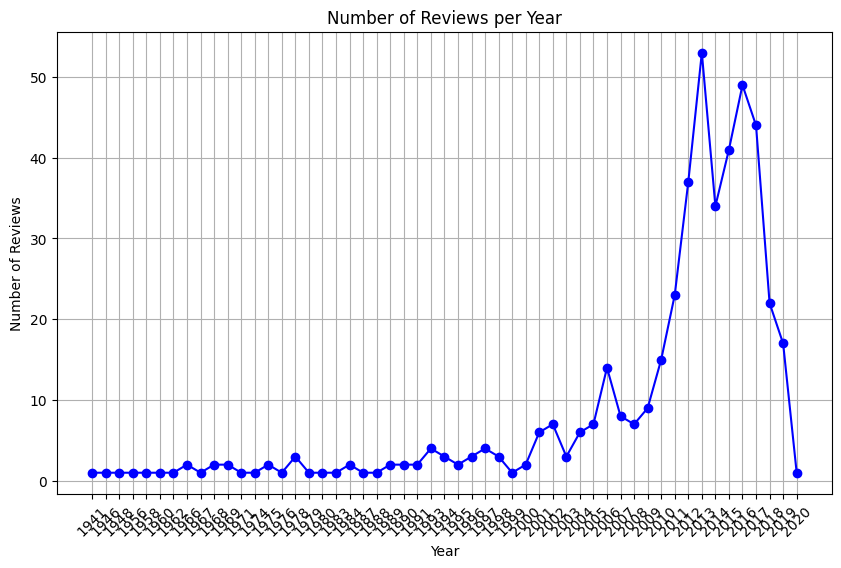

In [ ]:
import matplotlib.pyplot as plt

# Count number of reviews per year
year_counts = df['YEAR'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(year_counts.index, rotation=45)
plt.show()

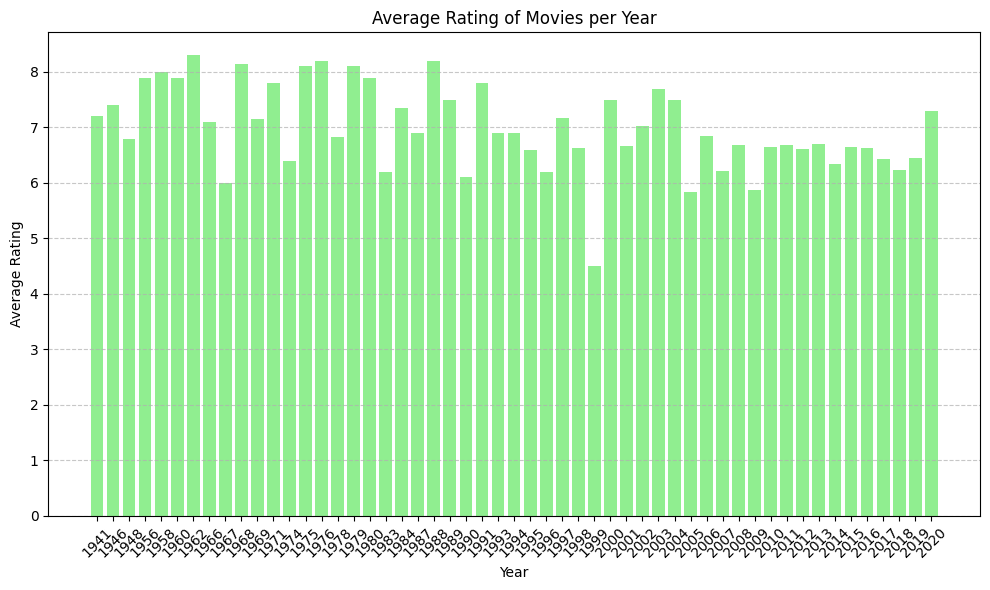

In [ ]:
yearly_avg_rating = df.groupby('YEAR')['RATING'].mean()

# Plotting a bar graph for average rating per year
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg_rating.index, yearly_avg_rating.values, color='lightgreen')
plt.title('Average Rating of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(yearly_avg_rating.index, rotation=45)
plt.show()

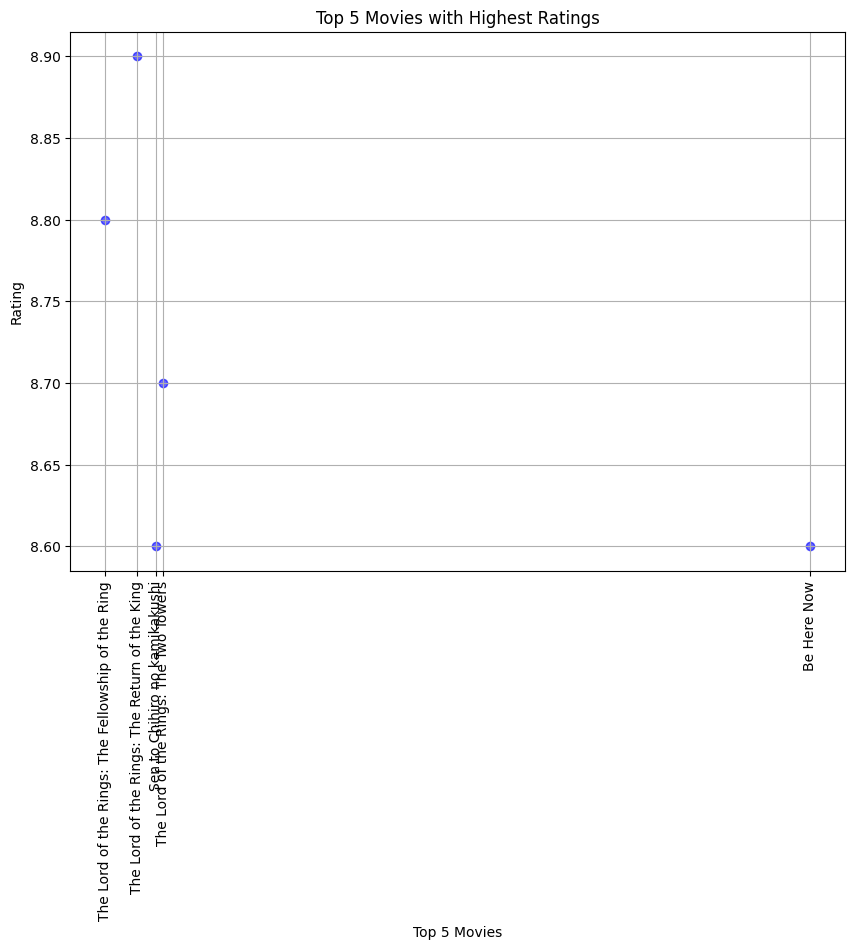

In [ ]:
top_5_movies = df.nlargest(5, 'RATING')

# Scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(top_5_movies.index,top_5_movies['RATING'],color='blue', alpha=0.6)
plt.title('Top 5 Movies with Highest Ratings')
plt.xlabel('Top 5 Movies')
plt.ylabel('Rating')
plt.xticks(top_5_movies.index, top_5_movies['MOVIES'], rotation=90)
plt.grid(True)
plt.show()